In [1]:
import pandas as pd
import re
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import typing
import os

%matplotlib notebook

In [2]:
import numpy as np

# txt file to pandas dataframe

In [3]:
def file_to_pd(file_path:str)-> pd.DataFrame:
    lst = []
    lst2 = []
    with open(file_path) as f:
        for line in f:
            if 'Потом айтензор' in line:
                break
            lst.append(dict(zip(['n1','n2','Re','Im'], list(map(float,re.findall(r'[\d\.e-]+', line))))))
        for line in f:
            lst2.append(dict(zip(['n1','n2','Re','Im'], 
                                 list(map(float,re.findall(r'[\d\.e-]+', line)))+[0])))

    df1 = pd.DataFrame(lst[1:])
    df2 = pd.DataFrame(lst2)
    df2 = df2[df2.n1 == df2.n2]
    df2.n1 += 1
    df2.n2 += 1
    df = pd.concat([df1, df2], axis = 0)
    df.sort_values(by = ['n1','n2'], inplace = True)
    df.reset_index(inplace = True, drop =True)
    
    return df


In [4]:
files_list = sorted(list(i for i in os.listdir(os.getcwd()) if '.txt' in i))
files_list

['W3_03_superconductive_L_12_24.txt',
 'W3_03_superconductive_L_17_29.txt',
 'W3_03_superconductive_L_8_16.txt',
 'W3_03_superconductive_L_8_17.txt',
 'W3_1_superconductive_L_12_24.txt',
 'W3_1_superconductive_L_8_16.txt',
 'W3_40_10_3_periodic_superconductive.txt',
 'W3_40_10_3superconductive.txt',
 'W3_40_10_5_periodic_superconductive.txt',
 'W3_40_10_5superconductive.txt',
 'W3_40_15_3_periodic_superconductive.txt',
 'W3_40_15_3superconductive.txt',
 'W3_40_15_5_periodic_superconductive.txt',
 'W3_40_15_5superconductive.txt',
 'W3_40_5_3_periodic_superconductive.txt',
 'W3_40_5_3superconductive.txt',
 'W3_40_5_5_periodic_superconductive.txt',
 'W3_40_5_5superconductive.txt',
 'W4_40_15_5_periodic_superconductive.txt',
 'W4_40_15_5_superconductive.txt',
 'W5_40_10_10_superconductive.txt',
 'W5_40_13_7_superconductive.txt',
 'W5_40_15_5_superconductive.txt',
 'W5_40_17_3superconductive.txt',
 'W5_40_18_2_superconductive.txt',
 'W5_40_19_1_superconductive.txt']

In [7]:
w3 = [i for i in files_list if 'W3_03' in i or 'W3_1' in i]

In [8]:
w3

['W3_03_superconductive_L_12_24.txt',
 'W3_03_superconductive_L_17_29.txt',
 'W3_03_superconductive_L_8_16.txt',
 'W3_03_superconductive_L_8_17.txt',
 'W3_1_superconductive_L_12_24.txt',
 'W3_1_superconductive_L_8_16.txt']

In [9]:
for name in w3:
    
    df = file_to_pd(name)
    df.to_csv(name.split('.')[0]+'.csv', index = False)
    print(name)

W3_03_superconductive_L_12_24.txt
W3_03_superconductive_L_17_29.txt
W3_03_superconductive_L_8_16.txt
W3_03_superconductive_L_8_17.txt
W3_1_superconductive_L_12_24.txt
W3_1_superconductive_L_8_16.txt


# I have parsed txt files to csv

The csv's that you need are below

In [11]:
files_list = sorted(list(i for i in os.listdir(os.getcwd()) if '.csv' in i and 'W3' in i))
files_list

['W3_03_superconductive_L_12_24.csv',
 'W3_03_superconductive_L_17_29.csv',
 'W3_03_superconductive_L_8_16.csv',
 'W3_03_superconductive_L_8_17.csv',
 'W3_1_superconductive_L_12_24.csv',
 'W3_1_superconductive_L_8_16.csv']

You can read these files using pandas

In [16]:
df12_24 = pd.read_csv('W3_03_superconductive_L_12_24.csv')
df12_24

,n1,n2,Re,Im
0,1.0,1.0,0.931693,0.0
1,1.0,2.0,0.027375,0.0
2,1.0,3.0,0.012440,0.0
3,1.0,4.0,0.025079,0.0
4,1.0,5.0,0.042417,0.0
...,...,...,...,...
7255,118.0,119.0,0.027358,0.0
7256,118.0,120.0,0.012436,0.0
7257,119.0,119.0,0.833900,0.0
7258,119.0,120.0,0.027356,0.0


# code snippet from Tian-Cheng

In [8]:
# import numpy as np

# '''
# dx	dy	<Delta⁺_j Delta_i>  --  s-wave
# 0	0	0.43536001696060 + I * 0.00000000000000
# 0	1	0.18038227330943 + I * -0.00000000000000
# 0	2	0.10985737618875 + I * -0.00000000000000
# 0	3	0.18038227330943 + I * 0.00000000000000
# 1	0	0.18038227330943 + I * -0.00000000000000
# 1	1	0.10985737618875 + I * -0.00000000000000
# 1	2	0.11909652058616 + I * -0.00000000000000
# 1	3	0.10985737618875 + I * 0.00000000000000
# 2	0	0.10985737618875 + I * -0.00000000000000
# 2	1	0.11909652058616 + I * -0.00000000000000
# 2	2	0.10341090148926 + I * -0.00000000000000
# 2	3	0.11909652058616 + I * 0.00000000000000
# 3	0	0.18038227330943 + I * 0.00000000000000
# 3	1	0.10985737618875 + I * -0.00000000000000
# 3	2	0.11909652058616 + I * 0.00000000000000
# 3	3	0.10985737618875 + I * 0.00000000000000
# '''

# # data = read_corr(file_out, str_to_find) # read the datafile like above
# # print(data)
# rxs = data[:, 0]
# rys = data[:, 1]
# corrs = data[:, 2]

# lx = 40
# ly = 4
# pi = np.pi
# exp = np.exp
# kxarray = np.arange(0, 2 * pi + 0.0001, 2 * pi / lx)
# kyarray = np.arange(0, 2 * pi + 0.0001, 2 * pi / ly)

# # Sxys = np.full((len(kxarray), len(kyarray)), np.nan)

# # for i_kx, kx in enumerate(kxarray):
# #     for i_ky, ky in enumerate(kyarray):
# #         Sxy = 0
# #         for r, corr in enumerate(corrs):
# #             rx = rxs[r]
# #             ry = rys[r]
# #             Sxy = Sxy + corr * exp(1j * (rx * kx + ry * ky))

# #         Sxys[i_kx, i_ky, i_sz] = Sxy

In [9]:
# len(kxarray)

# Overleaf graphs for W = 5, Nup = 15, Ndown = 5

In [28]:
df15_5 = file_to_pd('W5_40_15_5_superconductive.txt')

In [29]:
df15_5[(df15_5.n1 == 100) & (df15_5.n2 == 101)]

,n1,n2,Re,Im
14950,100.0,101.0,-0.001917,0.0


In [30]:
df15_5

,n1,n2,Re,Im
0,1.0,1.0,0.992052,0.0
1,1.0,2.0,0.000295,0.0
2,1.0,3.0,0.000333,0.0
3,1.0,4.0,0.000227,0.0
4,1.0,5.0,0.000073,0.0
...,...,...,...,...
20095,198.0,199.0,0.000931,0.0
20096,198.0,200.0,0.000332,0.0
20097,199.0,199.0,0.975852,0.0
20098,199.0,200.0,0.000293,0.0


## Taking our parameter values

In [12]:
W, L = 3, 40
ctr = W * (L//2) - W//2

In [13]:
ctr

59

In [19]:
def get(df, n1, n2):
    return df[(df.n1 == n1) & (df.n2 == n2)].Re.values

## In our program we have computed correlations for j>=i because correlation function is symmetric with respect to j <-> i

The function below gets all correlation values

In [18]:
# get all corr values
def get_all_correlations(data, site_num):
    d = data[(data.n2 == site_num)&(data.n2!=data.n1)].copy()
    d['add'] = d['n1']
    d['n1'] = d['n2']
    d['n2'] = d['add']
    d.drop('add', axis = 1, inplace = True)
    return pd.concat([data[data.n1 == site_num],
                      d], axis = 0).sort_values(by = 'n2')

In [35]:
cor = get_all_correlations(df15_5, 98)

In [36]:
cor

,n1,n2,Re,Im
97,98.0,1.0,-0.000098,0.0
296,98.0,2.0,-0.000265,0.0
494,98.0,3.0,-0.000333,0.0
691,98.0,4.0,-0.000265,0.0
887,98.0,5.0,-0.000098,0.0
...,...,...,...,...
14842,98.0,196.0,0.000026,0.0
14843,98.0,197.0,0.000073,0.0
14844,98.0,198.0,0.000094,0.0
14845,98.0,199.0,0.000073,0.0


Let's compute correlations for the site with coordinates (3,20) in (W,L) plane


for W = 5 in iTensor sites are enumerated as:


    
    1   6	11	...
    2   7	12	...
    3   8	13	...
    4   9	14	...
    5   10   15  ...
    
so we have to compute differences between sites in x and y directions first

In [37]:
L = 40
W = 5

cor['L_r'] = np.array([[i+1]*W for i in range(L)]).flatten() #right site index in L-direction
cor['W_r'] = np.array([list(range(1,W+1)) for _ in range(L)]).flatten() #right site index in W-direction

cor['L_l'] = 20 #left site index in L-direction (it is constant - center of the lattice on central leg)
cor['W_l'] = 3 #left site index in W-direction (it is constant - center of the lattice on central leg)

for Fourier-transformed values we'll need $\frac{1}{WL}\sum{\rho(l_1,l_2,w_1,w_2)}cos(k_x(l_1-l_2) + k_y(w_1 - w_2))$ see [Feiguin](https://arxiv.org/pdf/0809.1539.pdf) eq. (2)

I used cos here, because all correlation values are real

In [38]:
cor['delta_x'] = cor['L_l'] - cor['L_r']
cor['delta_y'] = cor['W_l'] - cor['W_r']

In [39]:
ny = list(range(-2, 3)) # ny values for Fourier transformation
nx = list(range(-19, 21)) # nx values for Fourier transformation

In [40]:
s = {(n_kx, n_ky) :0 
         for n_kx in nx 
         for n_ky in ny}

In [41]:
L = 40
W = 5

In [42]:
for n_kx, n_ky in s:
    dd = cor.copy()
    kx = 2*np.pi * n_kx / L
    ky = 2*np.pi * n_ky / W

    dd['phase'] = kx * dd['delta_x'] + ky * dd['delta_y']
    dd['cos'] = np.cos(dd['phase'])
    dd['product'] = dd['cos']*dd['Re']*(1/(L*W))
    s[(n_kx, n_ky)] = dd['product'].sum()

# Function for producing 2D-Fourier

position - site position in iTensor notation

In [20]:
def get_2d_fourier(data, W, L, position):
    df = data.copy()
    df['L_r'] = np.array([[i+1]*W for i in range(L)]).flatten() #right site index in L-direction
    df['W_r'] = np.array([list(range(1,W+1)) for _ in range(L)]).flatten() #right site index in W-direction
    
    df['L_l'] = df[df.n2==position].L_r.values[0] 
    df['W_l'] = df[df.n2==position].W_r.values[0]   
    
    df['delta_x'] = df['L_l'] - df['L_r']
    df['delta_y'] = df['W_l'] - df['W_r']
    
    ny = list(range(-W//2, W//2+1)) # ny values for Fourier transformation
    nx = list(range(-L//2+1, L//2+1)) # nx values for Fourier transformation
    
    s = {(n_kx, n_ky) :0 
         for n_kx in nx 
         for n_ky in ny}
    
    for n_kx, n_ky in s:
#         dd = cor.copy()
        kx = 2*np.pi * n_kx / L
        ky = 2*np.pi * n_ky / W

        df['phase'] = kx * df['delta_x'] + ky * df['delta_y']
        df['cos'] = np.cos(df['phase'])
        df['product'] = df['cos']*df['Re']*(1/(L*W))
        s[(n_kx, n_ky)] = df['product'].sum()
        
    return s

In [24]:
W, L = 3, 40
ctr = W * (L//2) - W//2
ctr

59

In [25]:
df_03_12_24 = file_to_pd('W3_03_superconductive_L_12_24.txt')
cor = get_all_correlations(df_03_12_24, ctr)

In [28]:
s = get_2d_fourier(cor, W, L, ctr)

In [29]:
kx1 = [2*np.pi * i[0] / L for i in s if (i[0] >= 0 and i[1] >= 0)]
ky1 = [2*np.pi * i[1] / W for i in s if (i[0] >= 0 and i[1] >= 0)]
skxy = [s[(i[0], i[1])] for i in s if (i[0] >= 0 and i[1] >= 0)]

In [37]:
df_1_12_24 = file_to_pd('W3_1_superconductive_L_12_24.txt')
cor = get_all_correlations(df_1_12_24, ctr)
s = get_2d_fourier(cor, W, L, ctr)
kx2 = [2*np.pi * i[0] / L for i in s if (i[0] >= 0 and i[1] >= 0)]
ky2 = [2*np.pi * i[1] / W for i in s if (i[0] >= 0 and i[1] >= 0)]
skxy2 = [s[(i[0], i[1])] for i in s if (i[0] >= 0 and i[1] >= 0)]

# Fancy 3d graph

<IPython.core.display.Javascript object>


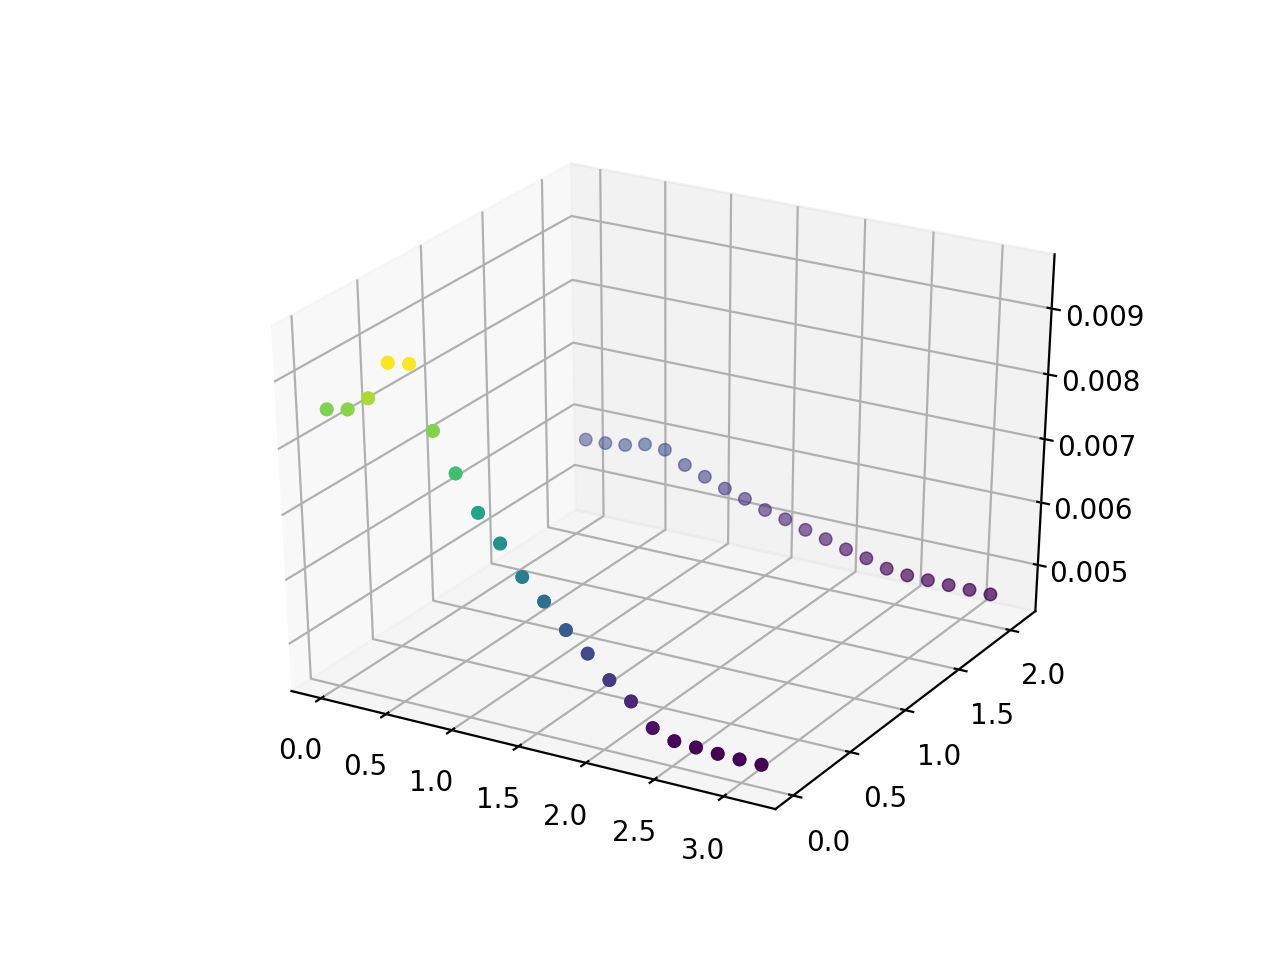

In [36]:
%matplotlib notebook
ax = plt.axes(projection='3d')
ax.scatter(kx1[:], ky1[:], skxy[:], 
           c = skxy[:], 
           cmap='viridis', 
           linewidth=0.5);
# ax.scatter(kx2[:], ky2[:], skxy2[:], 
#            c = skxy2[:], 
#            cmap='viridis', 
#            linewidth=0.5);

# Normal graph 

<IPython.core.display.Javascript object>


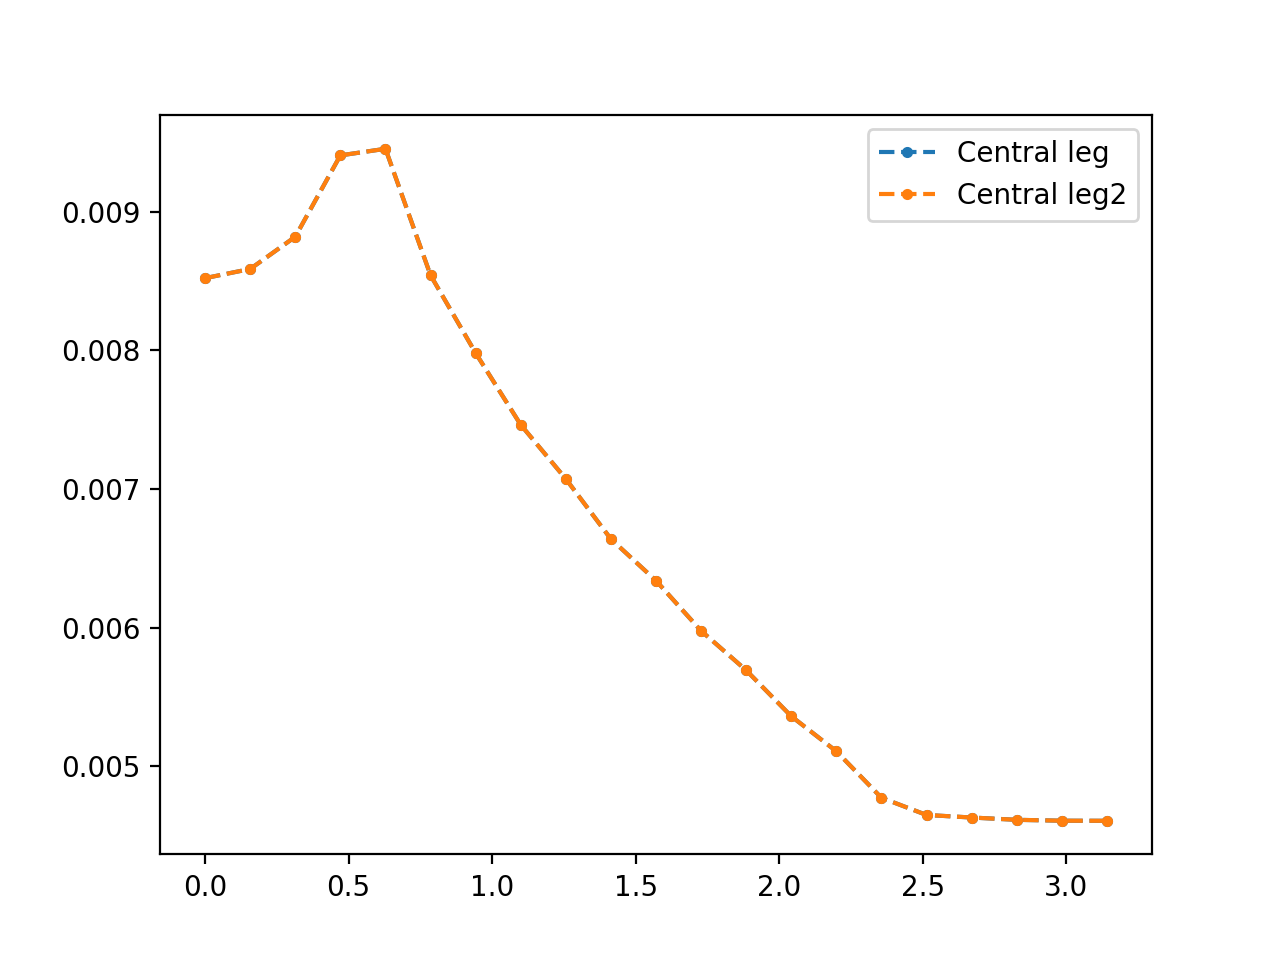

In [39]:
%matplotlib notebook
plt.plot(kx1[::2],skxy[::2], '.--', label ='Central leg')
# plt.plot(kx1[1::2],skxy[1::2], '.--', label ='Second leg')

plt.plot(kx2[::2],skxy2[::2], '.--', label ='Central leg2')
# plt.plot(kx2[1::2],skxy2[1::2], '.--', label ='Second leg2')
# plt.plot(kx1[2::3],skxy[2::3], '.--', label ='Border leg')
plt.legend()

# One also can look at raw correlation values (without fourier transformation)

In [49]:
filtered = cor[cor.n2>=cor.n1]
filtered

,n1,n2,Re,Im
14744,98.0,98.0,0.863299,0.0
14745,98.0,99.0,0.024576,0.0
14746,98.0,100.0,0.007688,0.0
14747,98.0,101.0,0.006018,0.0
14748,98.0,102.0,0.019252,0.0
...,...,...,...,...
14842,98.0,196.0,0.000026,0.0
14843,98.0,197.0,0.000073,0.0
14844,98.0,198.0,0.000094,0.0
14845,98.0,199.0,0.000073,0.0


In [50]:
ctr = 98 # our central site
corr_central = [get(cor, ctr, ctr + i_x*W) for i_x in range(L//2+1)]
corr_second = [get(cor, ctr, ctr+1 + i_x*W) for i_x in range(L//2+1)]
corr_border = [get(cor, ctr, ctr+2 + i_x*W) for i_x in range(L//2+1)]

We're throwing away correlation (taking [1:]) of a site with itself and with its neighbors along the W (because self-correlation is 1 order of magnitude higher than other correlations)

<IPython.core.display.Javascript object>


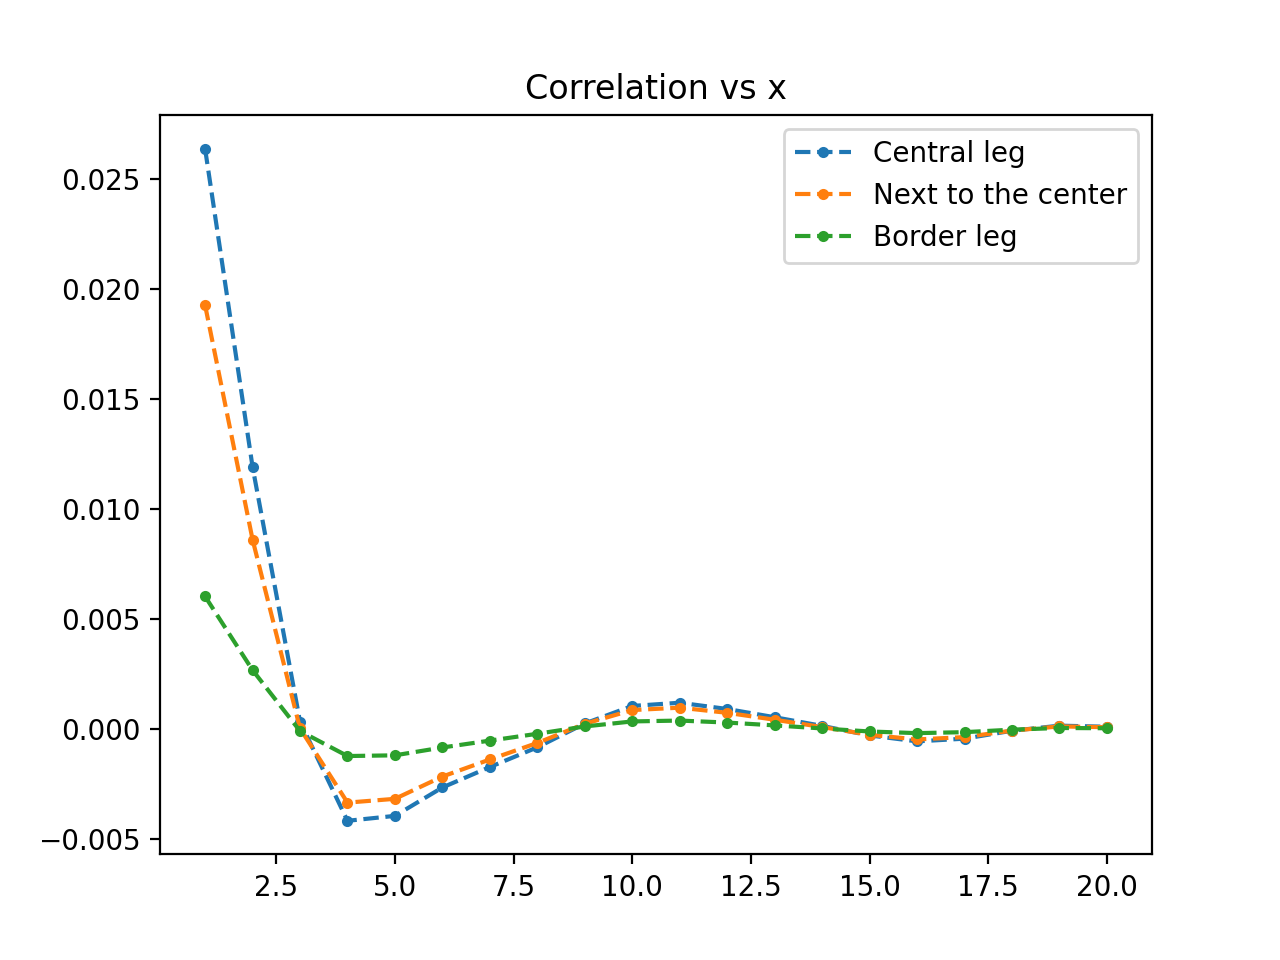

In [51]:
%matplotlib notebook

plt.plot([i+1 for i in range(len(corr_central)-1)],
         np.array(corr_central).ravel()[1:], '.--', label ='Central leg')
plt.plot([i+1 for i in range(len(corr_second)-1)],
         np.array(corr_second).ravel()[1:], '.--', label ='Next to the center')
plt.plot([i+1 for i in range(len(corr_border)-1)],
         np.array(corr_border).ravel()[1:], '.--', label ='Border leg')
# plt.xscale('log')

# # plt.yscale('log')
plt.title('Correlation vs x')
plt.legend()

# Ground state energies to calculate mu, h for correlations

In [90]:
# Nup =20 Ndown = 0 E = -64.1494785814035140 time: 681374 ms 681 sec W = 5 L = 40
# Nup =11 Ndown = 11 E = -100.9870773167060065 time: 76802862 ms 76802 sec W = 5 L = 40
# Nup =11 Ndown = 9 E = -89.9567734280141593 time: 173034069 ms 173034 sec W = 5 L = 40
# Nup =18 Ndown = 2 E = -71.1500456202175826 time: 259762148 ms 259762 sec W = 5 L = 40
# Nup =16 Ndown = 4 E = -77.5399842348290207 time: 271086499 ms 271086 sec W = 5 L = 40
# Nup =19 Ndown = 1 E = -67.7292983445369003 time: 284621115 ms 284621 sec W = 5 L = 40
# Nup =20 Ndown = 2 E = -76.7841779744041446 time: 308148136 ms 308148 sec W = 5 L = 40
# Nup =19 Ndown = 3 E = -80.2088098304044195 time: 358476411 ms 358476 sec W = 5 L = 40
# Nup =18 Ndown = 4 E = -83.4909610479946167 time: 366725272 ms 366725 sec W = 5 L = 40
# Nup =14 Ndown = 6 E = -82.9437056856404240 time: 379272510 ms 379272 sec W = 5 L = 40
# Nup =15 Ndown = 5 E = -80.3146895847640963 time: 94327665 ms 94327 sec W = 5L = 40
# Nup =16 Ndown = 6 E = -89.2978784708057560 time: 155718975 ms 155718 sec W = 5L = 40

### For Nup, Ndown = 15, 5 that reads

$\mu, h = {E(16,5\pm1) - E(15,5)\over 2}$

In [93]:
E15_5 = -80.3146895847640963
E16_6 = -89.2978784708057560
E16_4 = -77.5399842348290207


mu_15_5 = (E16_6 - E15_5)/2
h_15_5 = (E16_4 - E15_5)/2

print(r"mu_15_5 =", mu_15_5)
print(r"h_15_5 =", h_15_5)

mu_15_5 = -4.49159444302083
h_15_5 = 1.3873526749675378


# 10,10 

$\mu, h = {E(11,10\pm1) - E(10,10)\over 2}$

In [94]:
E10_10 = -91.9543851856964
E11_11 = -100.9870773167060065
E11_9 = -89.9567734280141593


mu_10_10 = (E11_11 - E10_10)/2
h_10_10 = (E11_9 - E10_10)/2

print(r"mu_10_10 =", mu_10_10)
print(r"h_10_10 =", h_10_10)

mu_10_10 = -4.5163460655048056
h_10_10 = 0.998805878841118


# 19, 1

$\mu, h = {E(20,1\pm1) - E(19,1)\over 2}$

In [95]:
E19_1 = -67.7292983445369003
E20_2 = -76.7841779744041446
E20_0 = -64.1494785814035140


mu_19_1 = (E20_2 - E19_1)/2
h_19_1 = (E20_0 - E19_1)/2

print(r"mu_19_1 =", mu_19_1)
print(r"h_19_1 =", h_19_1)

mu_19_1 = -4.527439814933622
h_19_1 = 1.7899098815666932


# Let's add the inset graph as in our overleaf-template explicitly

<IPython.core.display.Javascript object>


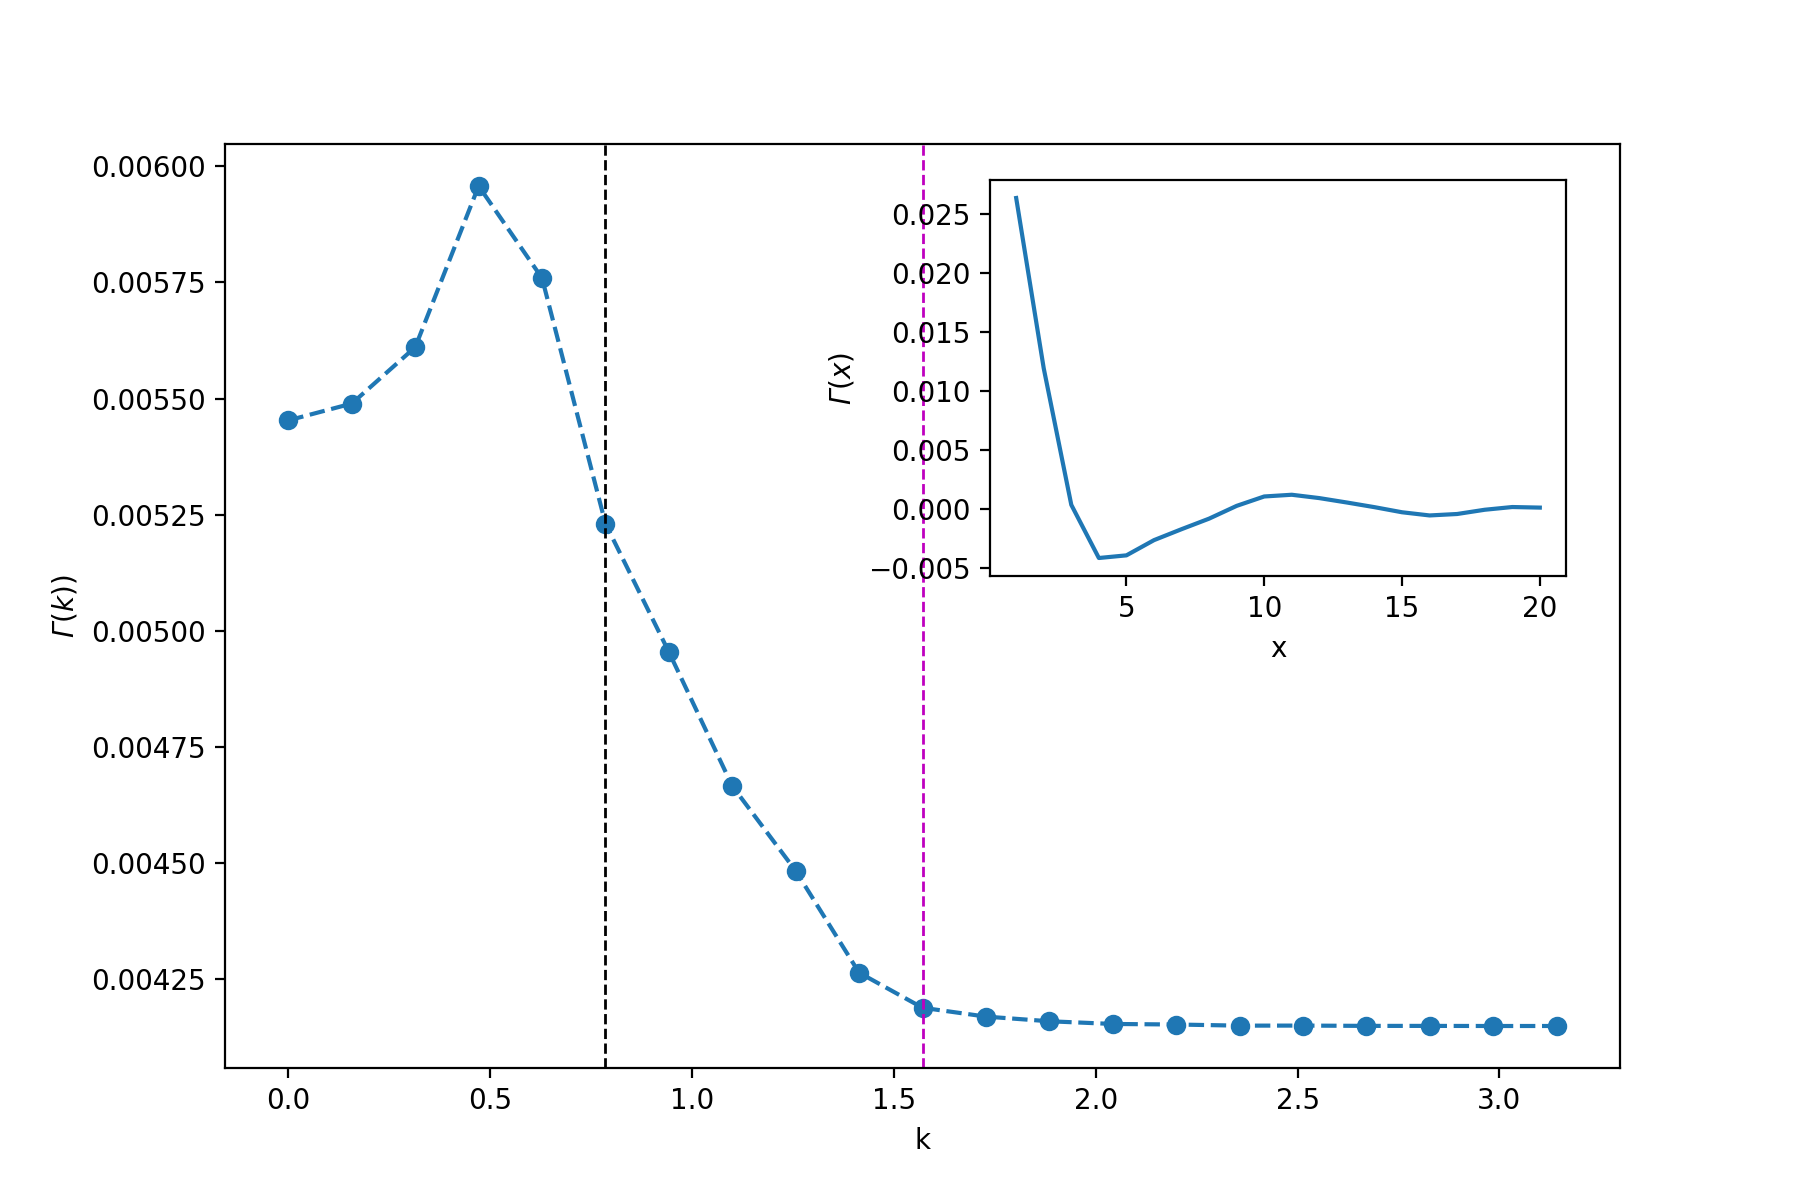

In [89]:
fig, ax1 = plt.subplots(figsize =(9,6))

Nup, Ndown = 15, 5

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.55, 0.52, 0.32, 0.33]
ax2 = fig.add_axes([left, bottom, width, height])

ax1.plot(kx1[::3],skxy[::3], 'o--')
ax1.set_ylabel(r'$Г(k)$')
ax1.set_xlabel('k')

ax1.axvline(np.pi * (Nup - Ndown)/L, ls='--', c='k', lw=1) #Nup - Ndn
ax1.axvline(np.pi * (Nup+Ndown)/L, ls='--', c='m', lw=1) #Nup + Ndn

ax2.plot([i+1 for i in range(len(corr_central)-1)],
         np.array(corr_central).ravel()[1:])
ax2.set_ylabel(r'$Г(x)$')
ax2.set_xlabel('x')

plt.show()

In [1]:
{"_segment6":"1740_4788_Запуск плашек Госуслуг (PDS-264)_Variant A","_segment3":"1715_4723_MCONF-1918 Запуск эксперимента PDS-310 Отложить напоминание в пуше_Variant С включенной кнопкой","_segment10":"condition_5726_Test_pam_2246","_segment8":"condition_4758_ad_new_module_ui","page":"1","_segment7":"condition_4380_Flush_pam_1295","aqid":"1ec70d56-c298-4bda-a9f6-48beac176cf5","qid":"1ec70d56-c298-4bda-a9f6-48beac176cf5","position":"18","_segment4":"1727_4752_Search_proxy_backend_restart_v5_analytics_Control A","bqid":"","_segment1":"1538_4271_Принудительное включение метатредов показ промо_Одинаковые A2","_segment9":"condition_5708_ad_new_module_loading","_segment2":"1712_4712_Добавить разделители на список писем_Control Group","behaviorname":"trustedURLs","_session_type":"","_segments_state":"exists","_email":"viachieslav.artiemiev@mail.ru","vertical":"mail","_segment5":"1728_4757_Новое меню Плюс в мобильном приложении_Новое новое меню плюса"}

{'_segment6': '1740_4788_Запуск плашек Госуслуг (PDS-264)_Variant A',
 '_segment3': '1715_4723_MCONF-1918 Запуск эксперимента PDS-310 Отложить напоминание в пуше_Variant С включенной кнопкой',
 '_segment10': 'condition_5726_Test_pam_2246',
 '_segment8': 'condition_4758_ad_new_module_ui',
 'page': '1',
 '_segment7': 'condition_4380_Flush_pam_1295',
 'aqid': '1ec70d56-c298-4bda-a9f6-48beac176cf5',
 'qid': '1ec70d56-c298-4bda-a9f6-48beac176cf5',
 'position': '18',
 '_segment4': '1727_4752_Search_proxy_backend_restart_v5_analytics_Control A',
 'bqid': '',
 '_segment1': '1538_4271_Принудительное включение метатредов показ промо_Одинаковые A2',
 '_segment9': 'condition_5708_ad_new_module_loading',
 '_segment2': '1712_4712_Добавить разделители на список писем_Control Group',
 'behaviorname': 'trustedURLs',
 '_session_type': '',
 '_segments_state': 'exists',
 '_email': 'viachieslav.artiemiev@mail.ru',
 'vertical': 'mail',
 '_segment5': '1728_4757_Новое меню Плюс в мобильном приложении_Новое но

In [180]:
# def fourier(df, x0, get=get):
#     s = {n_kx:0 for n_kx in range(-L//2+1, L//2+1)} # 
    
#     for n_kx in s:
#         for i_x in range(L//2):
#             kx = 2*np.pi * n_kx / L
#             phase = kx * i_x
#             term = get(df, x0, x0 + i_x*W) * np.cos(phase) / L
#             s[n_kx] += term
#     return s

In [181]:
# def fourier_2d(df, x0, get=get):
#     s = {(n_kx, n_ky) :0 
#          for n_kx in range(-L//2+1, L//2+1) 
#          for n_ky in range(-W//2, W//2+1)}
    
#     for n_kx, n_ky in s:
#         for i_x in range(L//2):
#             for i_y in range(W//2+1): # Тут +1 чтобы было три элемента (для нечетных нужен +1)
#                 kx = 2*np.pi * n_kx / L
#                 ky = 2*np.pi * n_ky / W

#                 phase = kx * i_x + ky * i_y

#                 term = get(df, x0, x0 + i_x*W+ i_y) * np.cos(phase)/ (L*W)  # Тут сдвигаем на i_y т.к. счет вдоль Oy
#                 s[(n_kx, n_ky)] += term
#     return s

# Central leg W = 5, Nup = 15, Ndown = 5

<IPython.core.display.Javascript object>


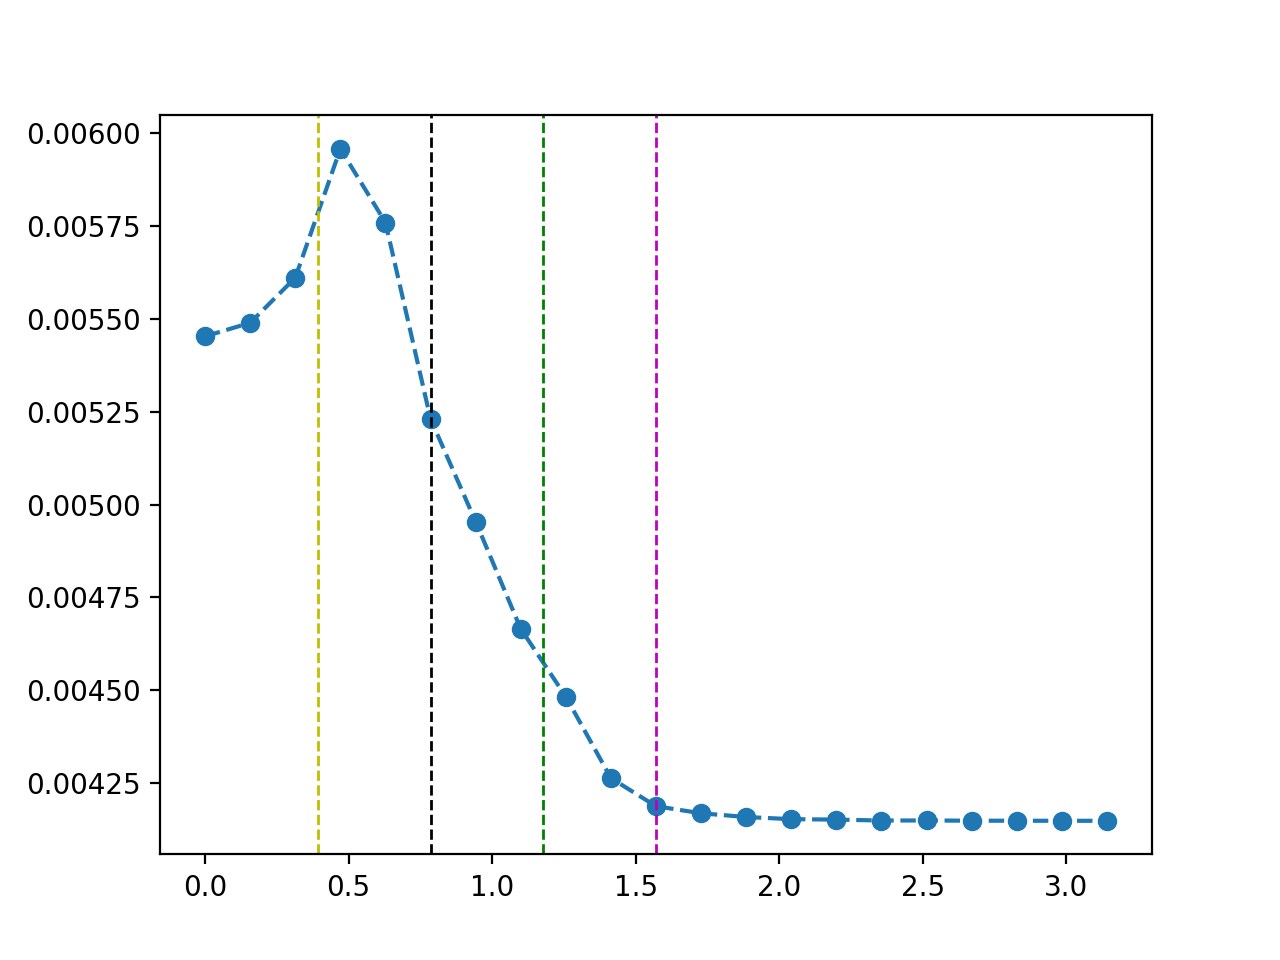

In [65]:
%matplotlib notebook

kx = kx1[::3]
skx = skxy[::3]

plt.plot(kx, skx, 'o--')
Nup, Ndown = 15, 5
plt.axvline(np.pi * (Nup)/L, ls='--', c='g', lw=1) #Nup
plt.axvline(np.pi * (Ndown)/L, ls='--', c='y', lw=1) #Ndn
plt.axvline(np.pi * (Nup - Ndown)/L, ls='--', c='k', lw=1) #Nup - Ndn
plt.axvline(np.pi * (Nup+Ndown)/L, ls='--', c='m', lw=1) #Nup + Ndn

# W5, Nup = 19, Ndown = 1, so called "polaron" line of the diagram

In [91]:
df19_1 = file_to_pd('W5_40_19_1_superconductive.txt')
W, L = 5, 40
ctr = W * (L//2) - W//2

In [92]:
ctr

98

## Let's draw the correlations

<IPython.core.display.Javascript object>


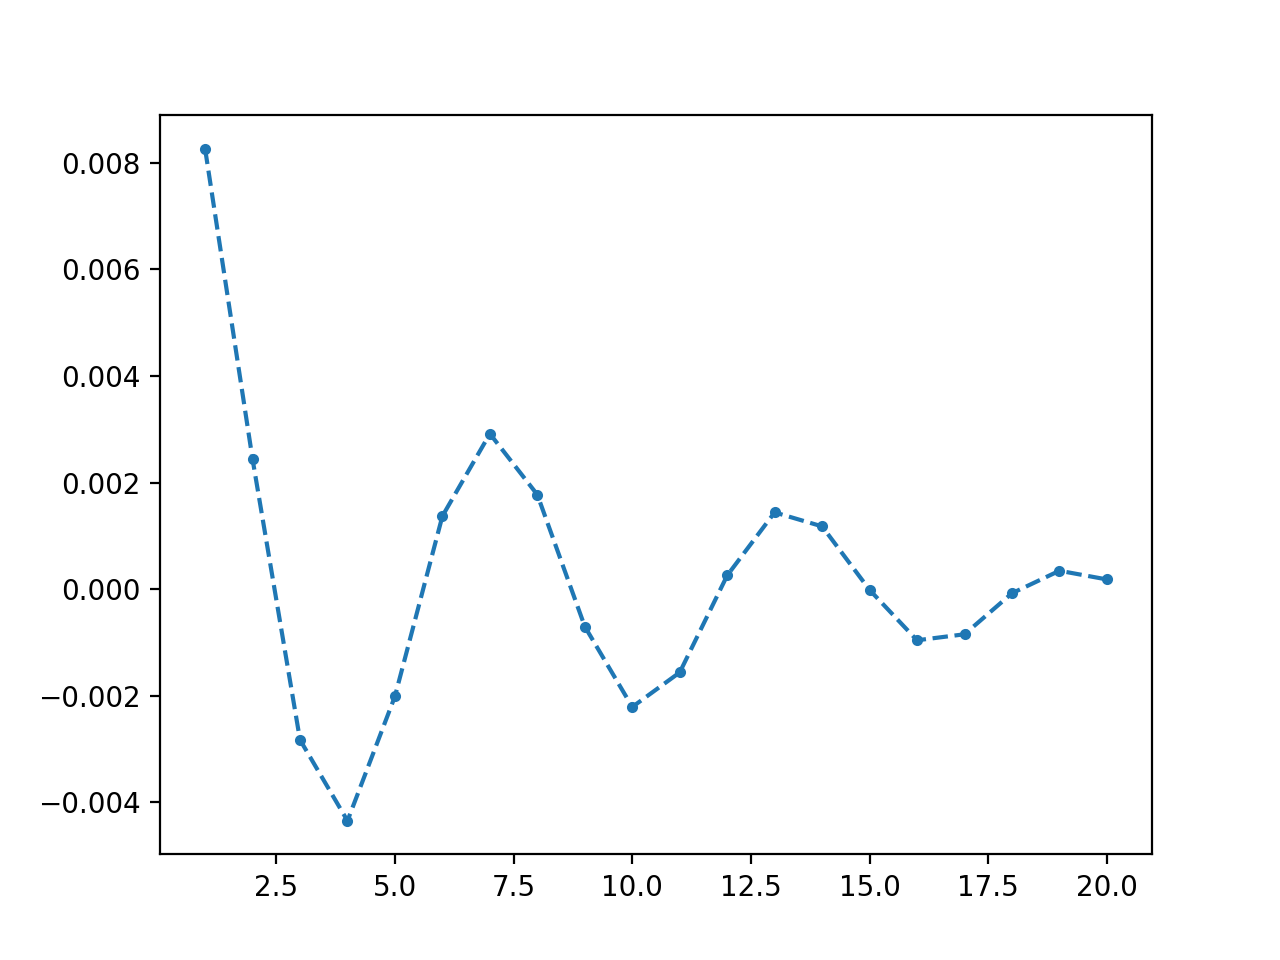

In [93]:
%matplotlib notebook
corr = [get(df, ctr, ctr + i_x*W) for i_x in range(L//2+1)]
plt.plot([i+1 for i in range(len(corr)-1)],
         np.array(corr).ravel()[1:], '.--')
# plt.xscale('log')
# plt.yscale('log')

In [94]:
cor = get_all_correlations(df, 98)
cor

,n1,n2,Re,Im
97,98.0,1.0,0.000031,0.0
296,98.0,2.0,0.000089,0.0
494,98.0,3.0,0.000112,0.0
691,98.0,4.0,0.000089,0.0
887,98.0,5.0,0.000031,0.0
...,...,...,...,...
14842,98.0,196.0,0.000050,0.0
14843,98.0,197.0,0.000144,0.0
14844,98.0,198.0,0.000182,0.0
14845,98.0,199.0,0.000144,0.0


In [95]:
cor = get_all_correlations(df19_1, 98)
fourier2d = get_2d_fourier(cor, 5, 40, 98)

kx1 = [2*np.pi * i[0] / L for i in fourier2d if (i[0] >= 0 and i[1] >= 0)]
ky1 = [2*np.pi * i[1] / W for i in fourier2d if (i[0] >= 0 and i[1] >= 0)]
skxy = [fourier2d[(i[0], i[1])] for i in fourier2d if (i[0] >= 0 and i[1] >= 0)]

<IPython.core.display.Javascript object>


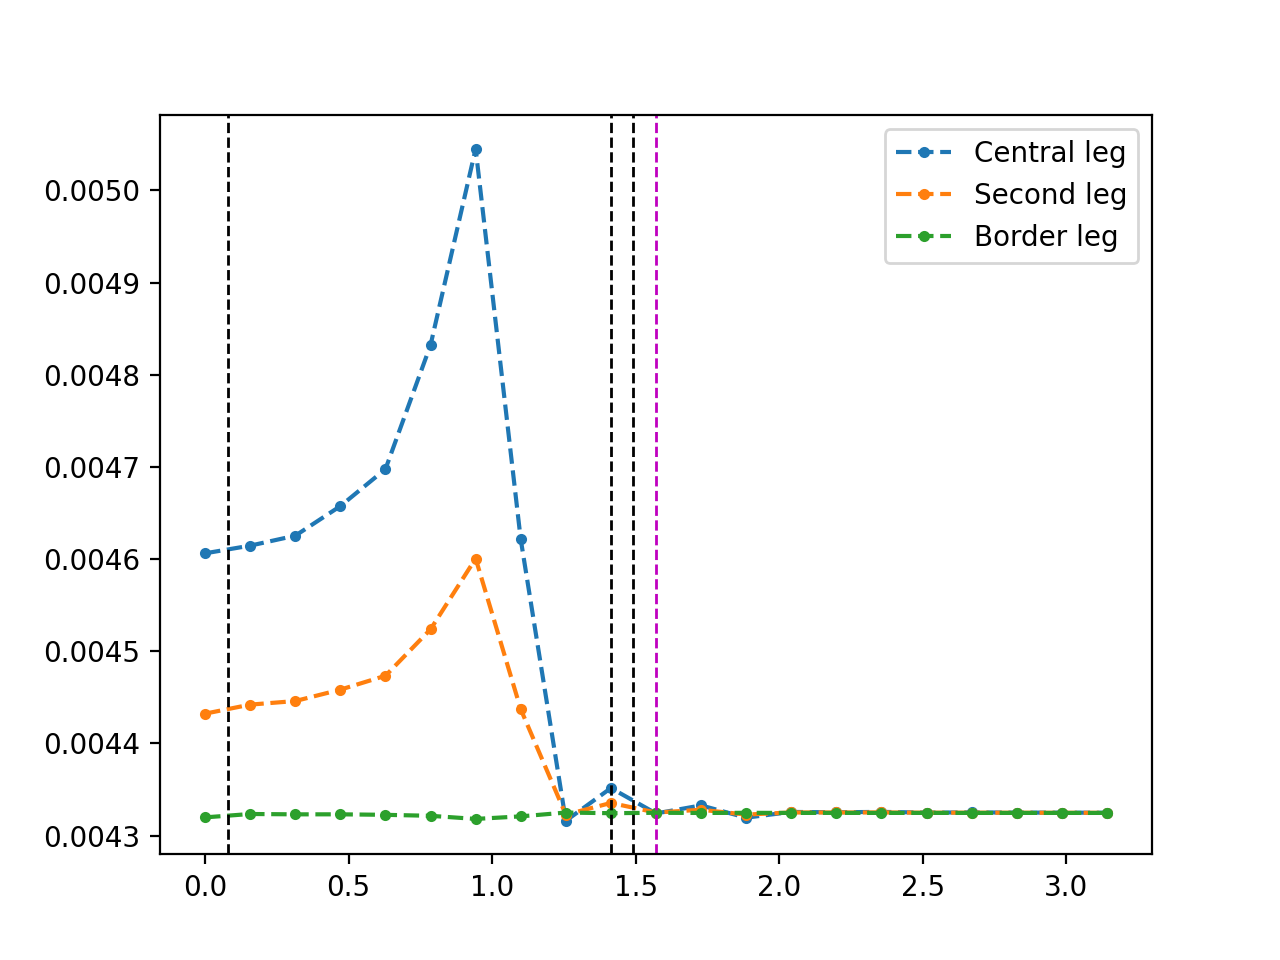

In [96]:
%matplotlib notebook

import matplotlib.pyplot as plt

plt.plot(kx1[::3],skxy[::3], '.--', label ='Central leg')
plt.plot(kx1[1::3],skxy[1::3], '.--', label ='Second leg')
plt.plot(kx1[2::3],skxy[2::3], '.--', label ='Border leg')
plt.legend()

Nup, Ndown = 19, 1
plt.axvline(np.pi * (Nup)/L, ls='--', c='k', lw=1)
plt.axvline(np.pi * (Ndown)/L, ls='--', c='k', lw=1)
plt.axvline(np.pi * (Nup - Ndown)/L, ls='--', c='k', lw=1)
plt.axvline(np.pi * (Nup+Ndown)/L, ls='--', c='m', lw=1)

<IPython.core.display.Javascript object>


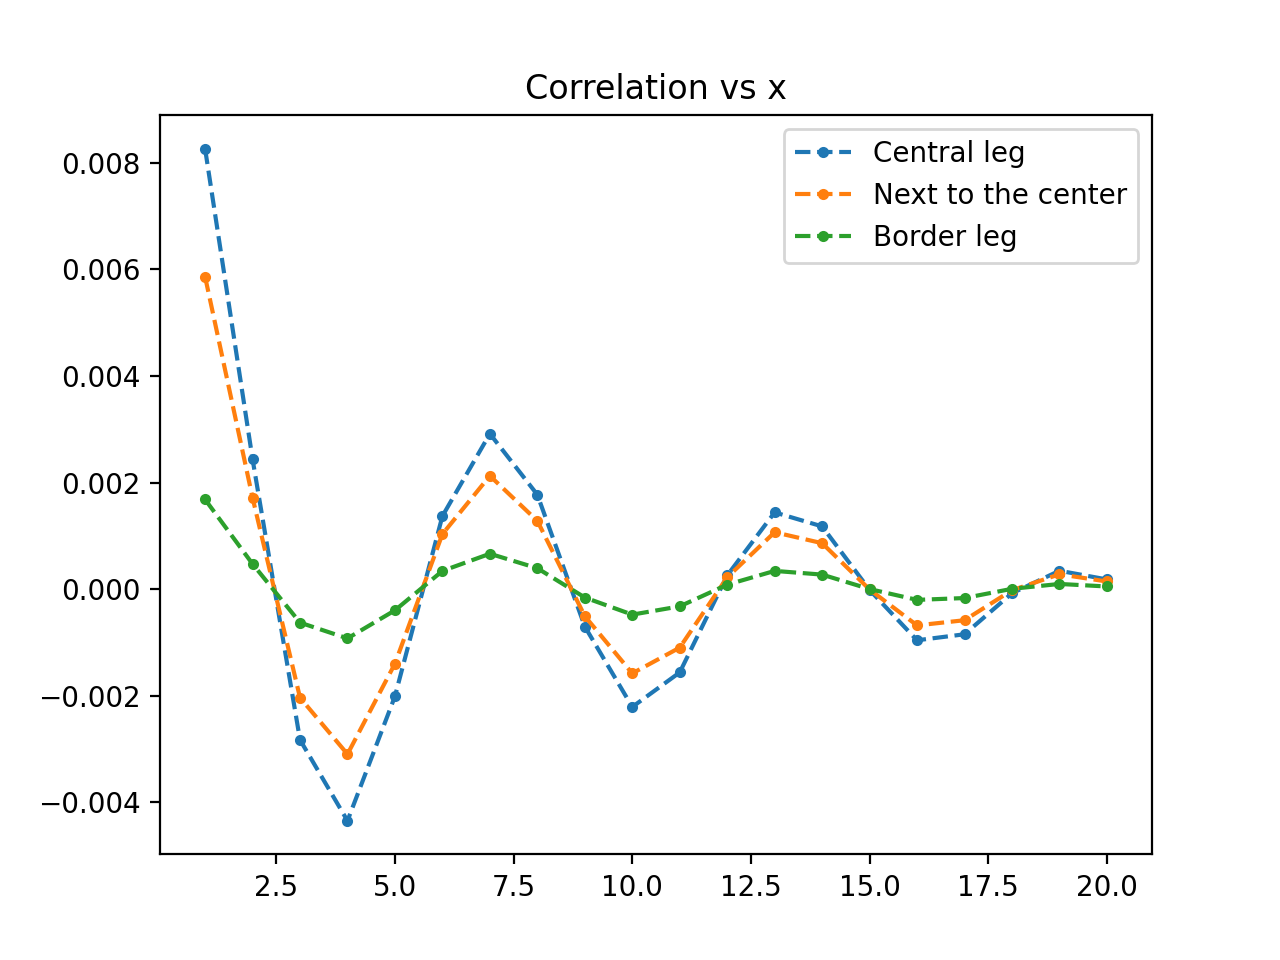

In [97]:
%matplotlib notebook
ctr = 98 # our central site
corr_central = [get(cor, ctr, ctr + i_x*W) for i_x in range(L//2+1)]
corr_second = [get(cor, ctr, ctr+1 + i_x*W) for i_x in range(L//2+1)]
corr_border = [get(cor, ctr, ctr+2 + i_x*W) for i_x in range(L//2+1)]

plt.plot([i+1 for i in range(len(corr_central)-1)],
         np.array(corr_central).ravel()[1:], '.--', label ='Central leg')
plt.plot([i+1 for i in range(len(corr_second)-1)],
         np.array(corr_second).ravel()[1:], '.--', label ='Next to the center')
plt.plot([i+1 for i in range(len(corr_border)-1)],
         np.array(corr_border).ravel()[1:], '.--', label ='Border leg')
# plt.xscale('log')

# # plt.yscale('log')
plt.title('Correlation vs x')
plt.legend()

# W5 Nup = 10, Ndown = 10, BCS

In [98]:
df10_10 = file_to_pd('W5_40_10_10_superconductive.txt')
W, L = 5, 40
ctr = W * (L//2) - W//2

In [99]:
cor = get_all_correlations(df10_10, 98)
fourier2d = get_2d_fourier(cor, 5, 40, 98)

kx1 = [2*np.pi * i[0] / L for i in fourier2d if (i[0] >= 0 and i[1] >= 0)]
ky1 = [2*np.pi * i[1] / W for i in fourier2d if (i[0] >= 0 and i[1] >= 0)]
skxy = [fourier2d[(i[0], i[1])] for i in fourier2d if (i[0] >= 0 and i[1] >= 0)]

# Correlation along central leg vs x

<IPython.core.display.Javascript object>


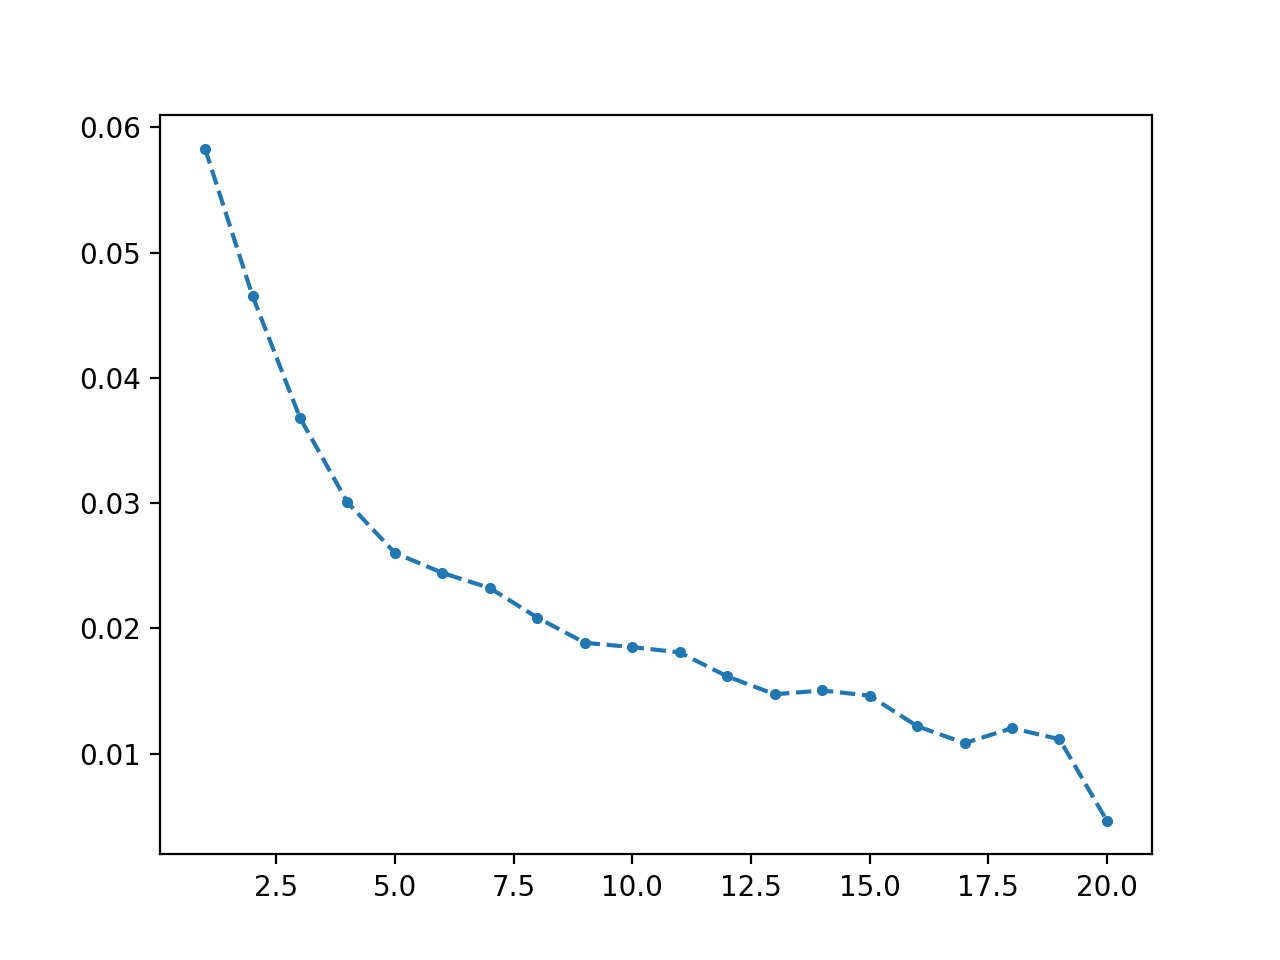

In [100]:
%matplotlib notebook
corr = [get(df10_10, ctr, ctr + i_x*W) for i_x in range(L//2+1)]
plt.plot([i+1 for i in range(len(corr)-1)],
         np.array(corr).ravel()[1:], '.--')
# plt.xscale('log')
# plt.yscale('log')

<IPython.core.display.Javascript object>


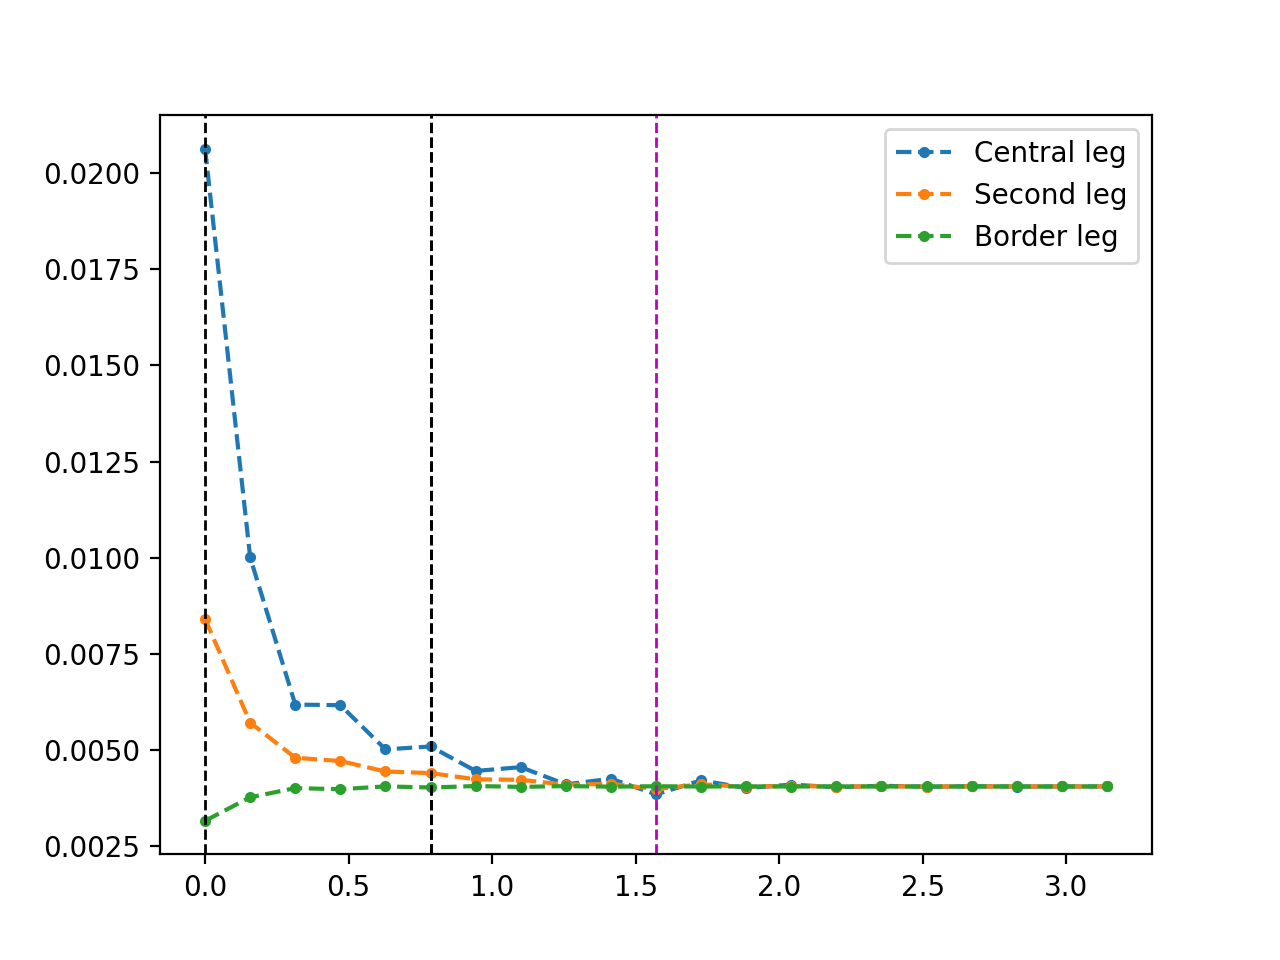

In [101]:
%matplotlib notebook

import matplotlib.pyplot as plt

plt.plot(kx1[::3],skxy[::3], '.--', label ='Central leg')
plt.plot(kx1[1::3],skxy[1::3], '.--', label ='Second leg')
plt.plot(kx1[2::3],skxy[2::3], '.--', label ='Border leg')
plt.legend()

Nup, Ndown = 10, 10
plt.axvline(np.pi * (Nup)/L, ls='--', c='k', lw=1)
plt.axvline(np.pi * (Ndown)/L, ls='--', c='k', lw=1)
plt.axvline(np.pi * (Nup - Ndown)/L, ls='--', c='k', lw=1)
plt.axvline(np.pi * (Nup+Ndown)/L, ls='--', c='m', lw=1)

# W5 Nup = 13, Ndown = 7

# W5 Nup = 15, Ndown = 5

# W5 Nup = 17, Ndown = 3

# W5 Nup = 18, Ndown = 2

# W5 Nup = 19, Ndown = 1



In [102]:
W, L = 5, 40
ctr = W * (L//2) - W//2

In [103]:
df13_7 = file_to_pd('W5_40_13_7_superconductive.txt')
df15_5 = file_to_pd('W5_40_15_5_superconductive.txt')
df17_3 = file_to_pd('W5_40_17_3superconductive.txt')
df18_2 = file_to_pd('W5_40_18_2_superconductive.txt')
df19_1 = file_to_pd('W5_40_19_1_superconductive.txt')
df10_10 = file_to_pd('W5_40_10_10_superconductive.txt')

In [ ]:
10,13,15,17,18,19

<IPython.core.display.Javascript object>


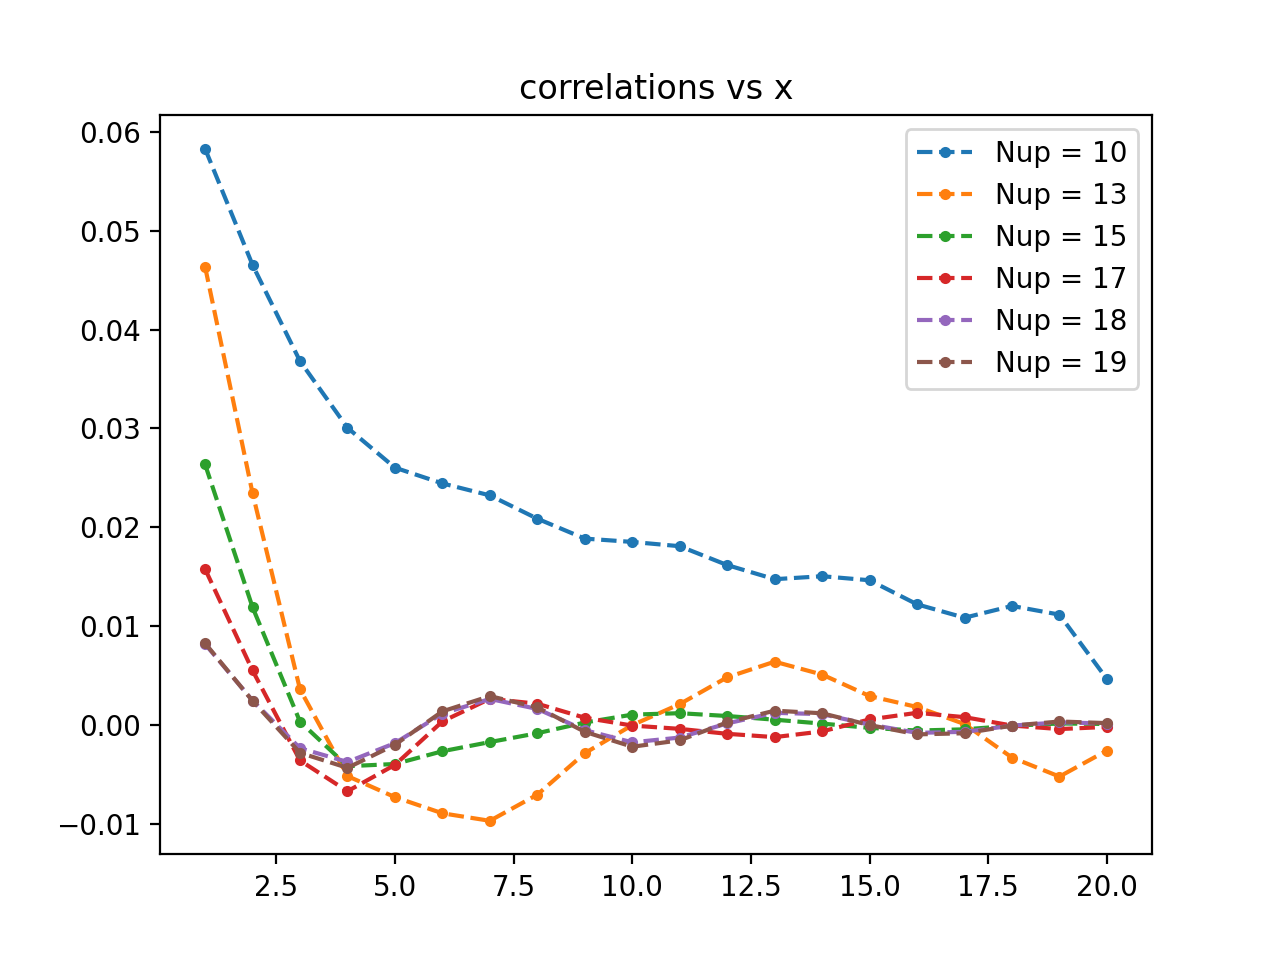

In [105]:
corr13 = [get(df13_7, ctr, ctr + i_x*W) for i_x in range(L//2+1)]
corr15 = [get(df15_5, ctr, ctr + i_x*W) for i_x in range(L//2+1)]
corr17 = [get(df17_3, ctr, ctr + i_x*W) for i_x in range(L//2+1)]
corr18 = [get(df18_2, ctr, ctr + i_x*W) for i_x in range(L//2+1)]
corr19 = [get(df19_1, ctr, ctr + i_x*W) for i_x in range(L//2+1)]
corr10 = [get(df10_10, ctr, ctr + i_x*W) for i_x in range(L//2+1)]


%matplotlib notebook
plt.plot([i+1 for i in range(len(corr10)-1)],
         np.array(corr10).ravel()[1:], '.--', label ='Nup = 10')
plt.plot([i+1 for i in range(len(corr13)-1)],
         np.array(corr13).ravel()[1:], '.--', label ='Nup = 13')
plt.plot([i+1 for i in range(len(corr15)-1)],
         np.array(corr15).ravel()[1:], '.--', label ='Nup = 15')
plt.plot([i+1 for i in range(len(corr17)-1)],
         np.array(corr17).ravel()[1:], '.--', label ='Nup = 17')
plt.plot([i+1 for i in range(len(corr18)-1)],
         np.array(corr18).ravel()[1:], '.--', label ='Nup = 18')
plt.plot([i+1 for i in range(len(corr19)-1)],
         np.array(corr19).ravel()[1:], '.--', label ='Nup = 19')
# plt.xscale('log')

# # plt.yscale('log')
plt.title('correlations vs x')
plt.legend()

In [107]:
def get_kx_ky_skxy(df, ctr):
    cor = get_all_correlations(df, ctr)
    fourier2d = get_2d_fourier(cor, 5, 40, ctr)

    kx1 = [2*np.pi * i[0] / L for i in fourier2d if (i[0] >= 0 and i[1] >= 0)]
    ky1 = [2*np.pi * i[1] / W for i in fourier2d if (i[0] >= 0 and i[1] >= 0)]
    skxy = [fourier2d[(i[0], i[1])] for i in fourier2d if (i[0] >= 0 and i[1] >= 0)]
    return kx1, ky1, skxy

In [108]:
ctr = 98

kx10, _, skx10 = get_kx_ky_skxy(df10_10, ctr)

kx13, _, skx13 = get_kx_ky_skxy(df13_7, ctr)

kx15, _, skx15 = get_kx_ky_skxy(df15_5, ctr)

kx17, _, skx17 = get_kx_ky_skxy(df17_3, ctr)

kx18, _, skx18 = get_kx_ky_skxy(df18_2, ctr)

kx19, _, skx19 = get_kx_ky_skxy(df19_1, ctr)

<IPython.core.display.Javascript object>


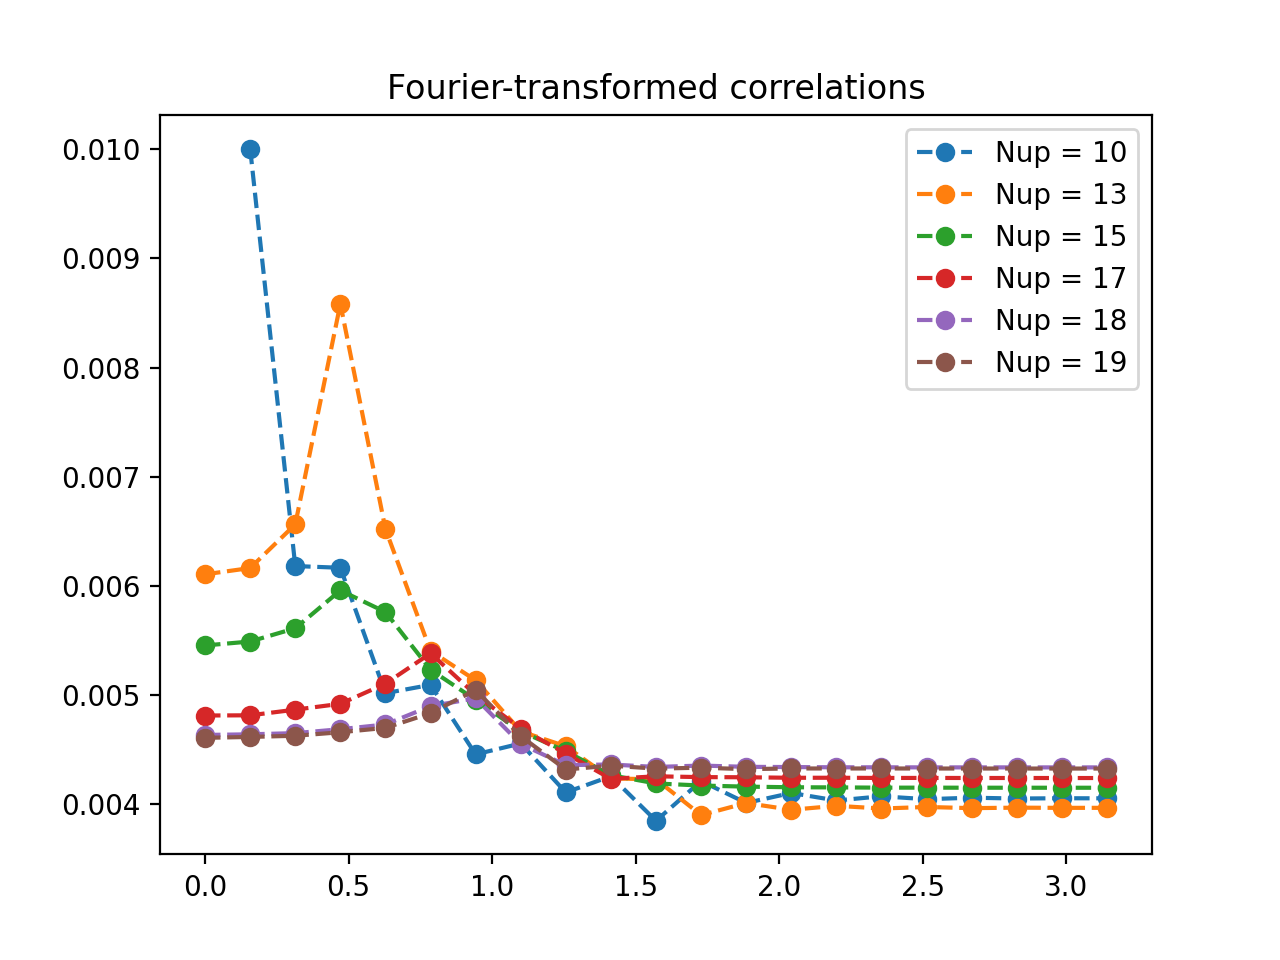

In [113]:
%matplotlib notebook

# import matplotlib.pyplot as plt
plt.plot(kx10[3::3], skx10[3::3], 'o--', label = 'Nup = 10') #I've thrown away the first value for 10,10
                                                         # because it's too large
plt.plot(kx13[::3], skx13[::3], 'o--', label = 'Nup = 13')
plt.plot(kx15[::3], skx15[::3], 'o--', label = 'Nup = 15')
plt.plot(kx17[::3], skx17[::3], 'o--', label = 'Nup = 17')
plt.plot(kx18[::3], skx18[::3], 'o--', label = 'Nup = 18')
plt.plot(kx19[::3], skx19[::3], 'o--', label = 'Nup = 19')
plt.title('Fourier-transformed correlations')
plt.legend()
# plt.axvline(np.pi * (Nup)/L, ls='--', c='g', lw=1)
# plt.axvline(np.pi * (Ndown)/L, ls='--', c='y', lw=1)
# plt.axvline(np.pi * (Nup - Ndown)/L, ls='--', c='k', lw=1)
# plt.axvline(np.pi * (Nup+Ndown)/L, ls='--', c='m', lw=1)

# !pip install lmfit

added graph of peak coordinate vs Sz https://arxiv.org/pdf/0707.4172.pdf

<IPython.core.display.Javascript object>


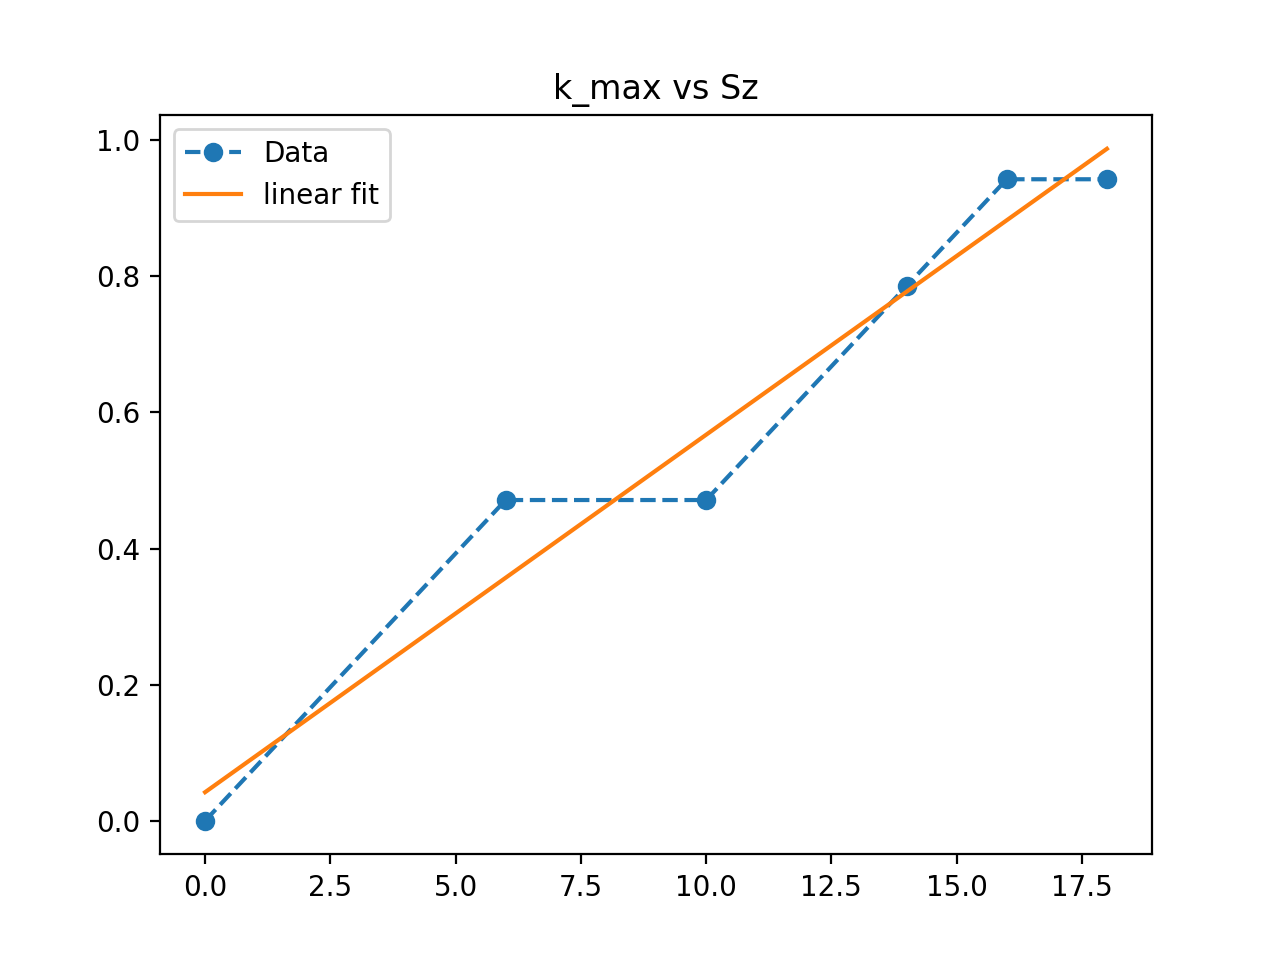

In [114]:
%matplotlib notebook

from lmfit.models import ExpressionModel

def get_peak(k, s):
    return k[:][np.array(s[:]).ravel().argmax()]

kmax = [get_peak(kx10[::3], skx10[::3]),
        get_peak(kx13[::3], skx13[::3]),
        get_peak(kx15[::3], skx15[::3]),
        get_peak(kx17[::3], skx17[::3]),
        get_peak(kx18[::3], skx18[::3]),
        get_peak(kx19[::3], skx19[::3])]
sz = [0, 6, 10, 14, 16, 18]

mod_kmax = ExpressionModel('a*x+b')

mod_kmax.set_param_hint("a", value=1.0, vary=True)
mod_kmax.set_param_hint("b", value=1.0, vary=True)
params_kmax = mod_kmax.make_params()

result_kmax = mod_kmax.fit(kmax, 
                           params_kmax, 
                           method="leastsq", 
                           x=sz)  # fitting


plt.title('k_max vs Sz')
plt.plot(sz, kmax, 'o--', label = 'Data')
plt.plot(sz, result_kmax.best_fit, '-', label = 'linear fit')
plt.legend()